  **Problem statement:** Anomaly detection in crowd through smartphone dataset

  **Objective:** Anomaly detection in crowd behavior using smartphone datasets means identifying unusual patterns or behaviors among individuals in a crowd.
             Smartphones, installed with various sensors like GPS, accelerometers, cameras, and gyroscopes, collect extensive data that can be analyzed to monitor movement,
             location, and activity. By applying machine learning algorithms and statistical methods to this data, anomalies such as sudden stops, erratic
             movements, or unexpected gatherings can be detected. This process helps in enhancing public safety, managing crowds in real-time, and preventing potential hazards.
             Effective anomaly detection leverages both the diversity and richness of smartphone data to provide timely and accurate insights.





 **data parameters:**
         Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
         'Acc', 'LevelOfCrowdness', 'label', 'Unnamed: 10'],
      dtype='object')


In [3]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [4]:
# import csv file
df = pd.read_csv('Crowd data for anomaly detection.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(24123, 12)

In [6]:



df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [8]:
#check for null values  (Feature Engineering)
pd.isnull(df).sum()#check for null values  (Feature Engineering)
pd.isnull(df).sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [9]:
df.shape

(24123, 12)

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
df.shape

(24019, 12)

In [12]:
# to get some important values from dataset
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000
mean,0.319808,19.990160,0.742707,90.316299,251.172655,2.511727,0.004203,2.337899,0.289354,0.510055
std,0.067306,1.202142,0.279287,4.809246,167.758391,1.677584,0.032528,1.456986,0.453472,0.857736
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264400,19.575300,0.496300,88.474500,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288400,0.784100,89.170100,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798700,337.000000,3.370000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [13]:
df.columns

Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

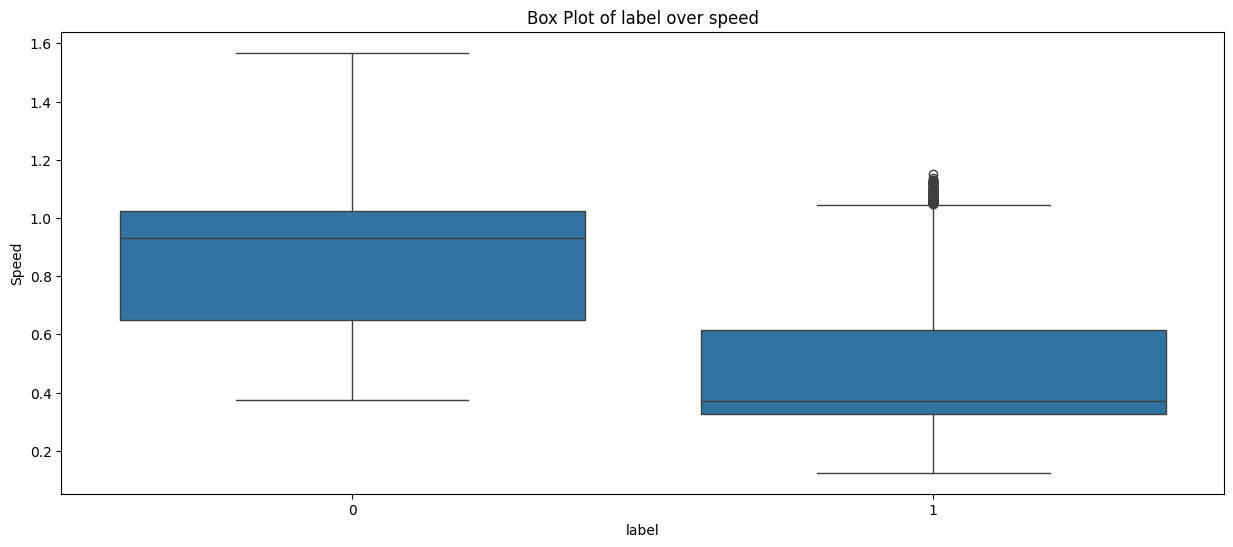

In [14]:
# Basic box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='label', y = 'Speed', data=df)
plt.title('Box Plot of label over speed')
plt.show()

We can clearly see the small circles depicting the outliers of the dataset.

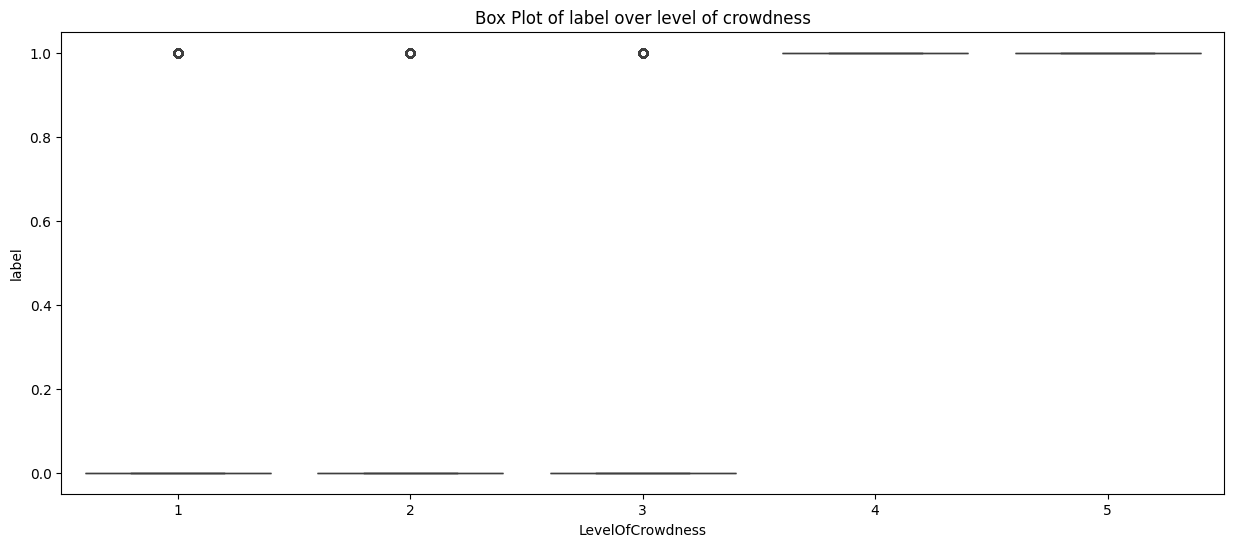

In [15]:
# Basic box plot with label as the key
plt.figure(figsize=(15, 6))
sns.boxplot(x='LevelOfCrowdness', y = 'label', data=df)
plt.title('Box Plot of label over level of crowdness')
plt.show()

       Since label 0 means '**normal**' and 1 means '**anomaly**, so we can clearly see that *anomaly* is detected at 4 and 5 level of crowdness.  

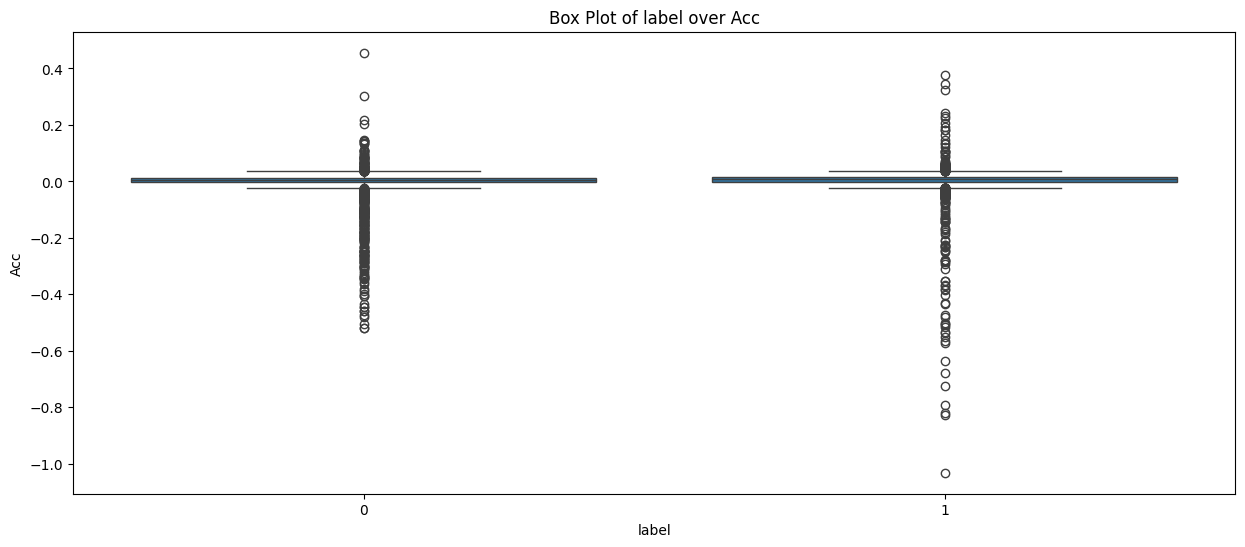

In [16]:
# Key as label
plt.figure(figsize=(15, 6))
sns.boxplot(x='label', y = 'Acc', data=df)
plt.title('Box Plot of label over Acc')
plt.show()

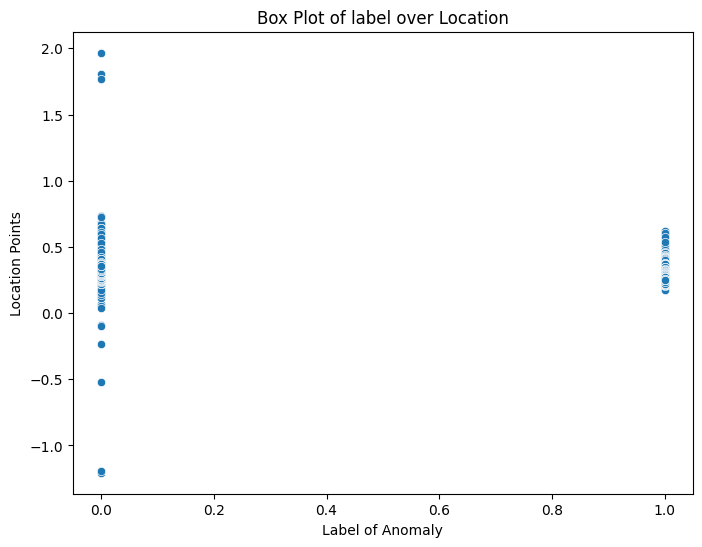

In [17]:
# Key as label
plt.figure(figsize=(8, 6))
sns.scatterplot(x='label', y = 'X', data=df)
plt.title('Box Plot of label over Location')
plt.xlabel('Label of Anomaly')
plt.ylabel('Location Points')
plt.show()

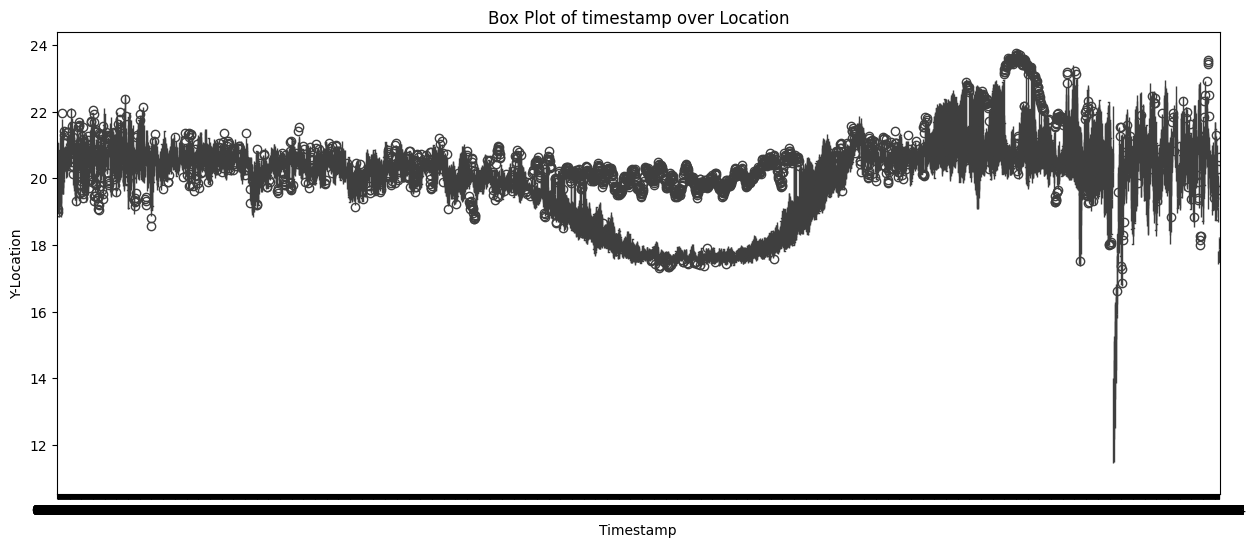

In [18]:
# Key as label
plt.figure(figsize=(15, 6))
sns.boxplot(x='timestamp', y = 'Y', data=df)
plt.title('Box Plot of timestamp over Location')
plt.xlabel('Timestamp')
plt.ylabel('Y-Location')
plt.show()

# **IQR Determination**


In [19]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000
mean,0.319808,19.990160,0.742707,90.316299,251.172655,2.511727,0.004203,2.337899,0.289354,0.510055
std,0.067306,1.202142,0.279287,4.809246,167.758391,1.677584,0.032528,1.456986,0.453472,0.857736
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264400,19.575300,0.496300,88.474500,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288400,0.784100,89.170100,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798700,337.000000,3.370000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [20]:
df.columns


Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

In [21]:
df['Density'].skew()

# Right Skewed

1.1026598594387964

<Axes: xlabel='Density'>

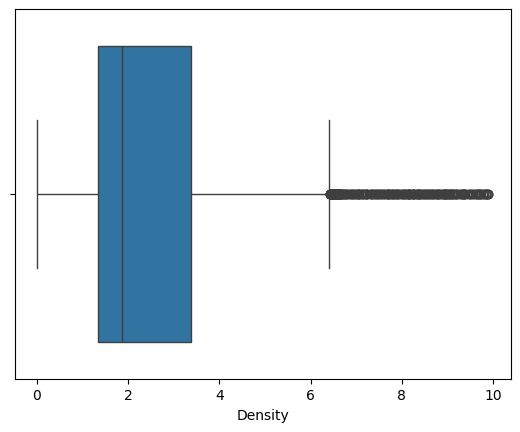

In [22]:
sns.boxplot(x = df['Density'])


In [23]:
# Finding iqr
per25 = df['Density'].quantile(0.25)
per75 = df['Density'].quantile(0.75)
print(per25)
print(per75)

1.34
3.37


In [24]:
iqr = per75 - per25
print(iqr)

2.0300000000000002


In [25]:

upper_limit = per75 + 1.5*iqr
lower_limit = per25 + 1.5*iqr

print(upper_limit)
print(lower_limit)

6.415000000000001
4.385000000000001


In [26]:
df[df['Density'] > upper_limit]

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
14785,0:37:24,0.2317,17.5431,0.2944,86.1967,642,6.42,0.0085,5,1,anomaly,2
14795,0:37:34,0.2343,17.4788,0.2789,87.3341,643,6.43,0.0089,5,1,anomaly,2
14796,0:37:35,0.2401,17.4930,0.2821,87.2745,642,6.42,0.0099,5,1,anomaly,2
14797,0:37:36,0.2260,17.5384,0.2761,86.1074,647,6.47,0.0002,5,1,anomaly,2
14798,0:37:37,0.2286,17.6003,0.2771,85.4710,650,6.50,0.0085,5,1,anomaly,2
...,...,...,...,...,...,...,...,...,...,...,...,...
22423,0:59:55,0.2476,20.7841,0.1411,128.1307,986,9.86,0.0021,5,1,anomaly,3
22424,0:59:56,0.2464,20.8038,0.1388,128.6967,986,9.86,-0.0023,5,1,anomaly,3
22425,0:59:57,0.2477,20.7936,0.1405,126.7505,989,9.89,0.0014,5,1,anomaly,3
22426,0:59:58,0.2465,20.7839,0.1420,125.6554,990,9.90,0.0016,5,1,anomaly,3


Total 275 rows found in density column, so need to trim those all.


**TRIMMING OF DATASET**

In [27]:
df.shape

(24019, 12)

In [28]:
new_df = df[df['Density'] < upper_limit]

In [29]:
new_df.shape

(23744, 12)

<ipython-input-30-58703b20d852>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Density'])
<ipython-input-30-58703b20d852>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Density'])


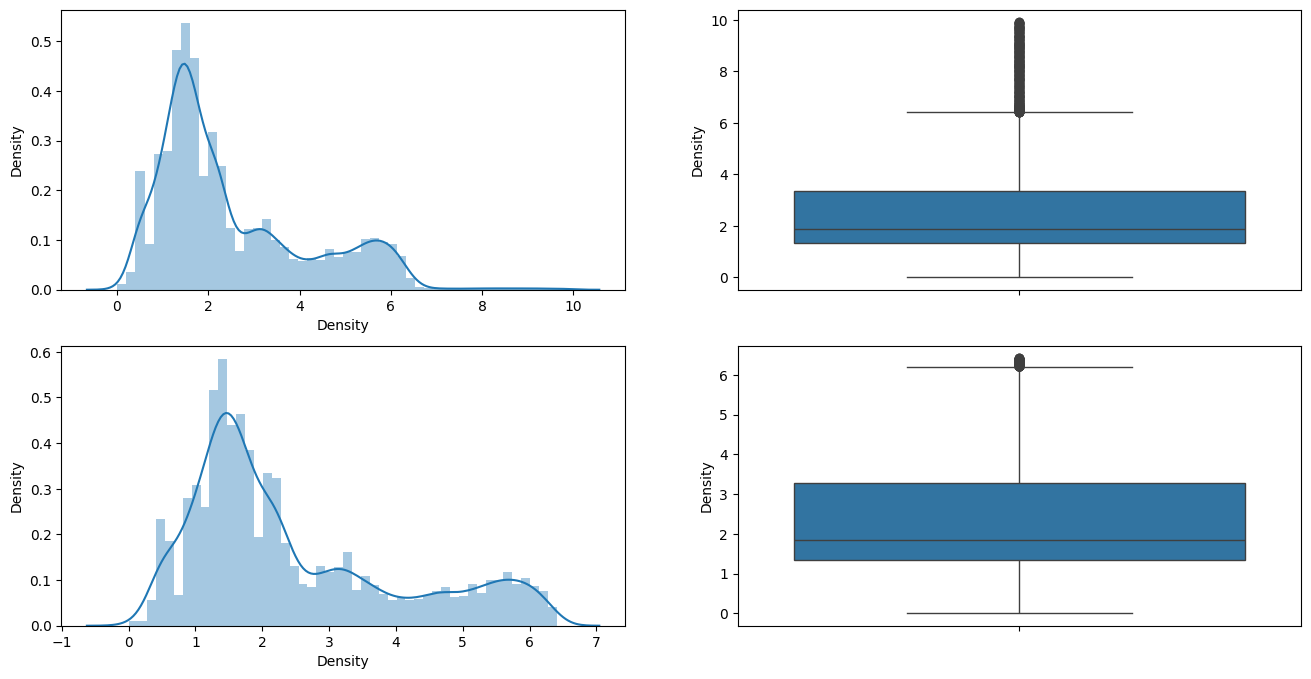

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Density'])

plt.subplot(2,2,2)
sns.boxplot(df['Density'])

plt.subplot(2,2,3)
sns.distplot(new_df['Density'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Density'])

plt.show()

# ***CAPPING***

In [31]:
new_df_cap = df.copy()

new_df_cap['Density'] = np.where(
    new_df_cap['Density'] > upper_limit,
    upper_limit,
    new_df_cap['Density']
)

In [32]:
new_df_cap.shape

(24019, 12)

<ipython-input-33-57734ce66fd6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Density'])
<ipython-input-33-57734ce66fd6>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Density'])


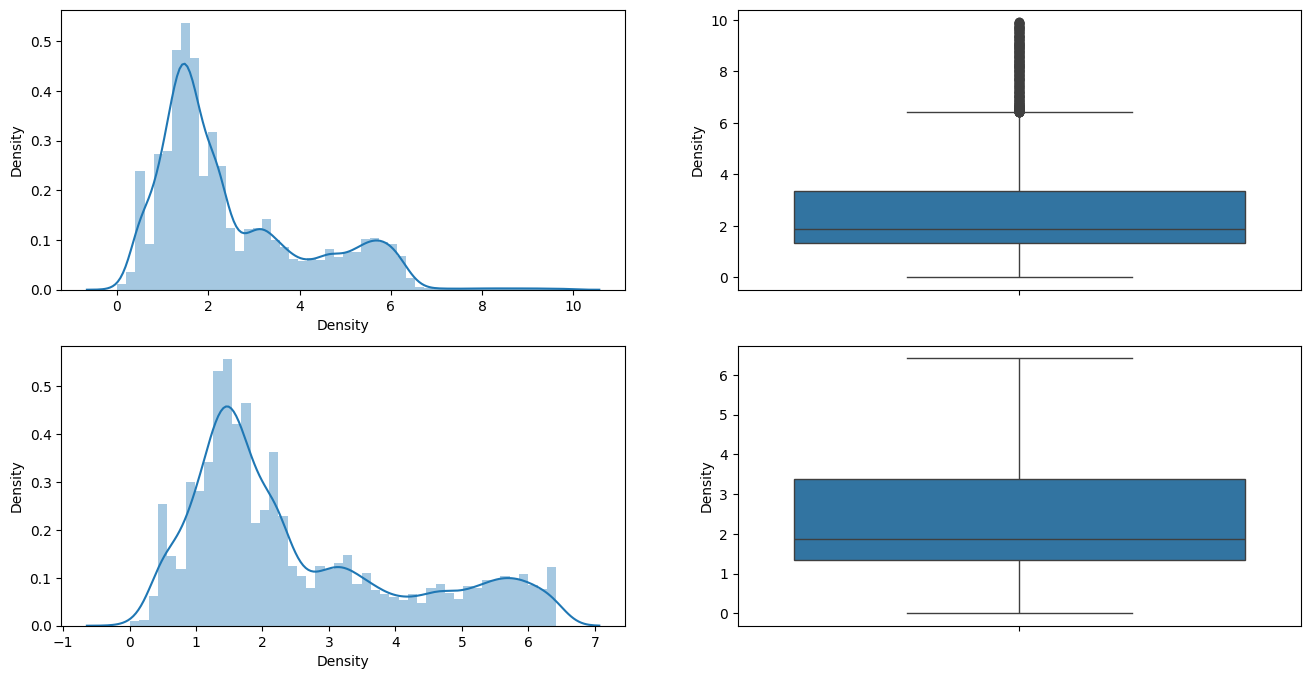

In [33]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Density'])

plt.subplot(2,2,2)
sns.boxplot(df['Density'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Density'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Density'])

plt.show()

<Axes: xlabel='AgentCount'>

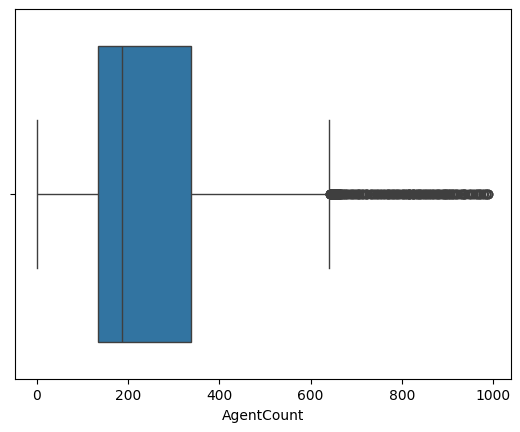

In [34]:
sns.boxplot(x = new_df_cap['AgentCount'])


In [35]:
# Finding iqr
per25 = new_df_cap['AgentCount'].quantile(0.25)
per75 = new_df_cap['AgentCount'].quantile(0.75)
print(per25)
print(per75)

134.0
337.0


In [36]:
iqr = per75 - per25
print(iqr)

203.0


In [37]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 + 1.5*iqr

print(upper_limit)
print(lower_limit)

641.5
438.5


In [38]:
new_df_cap[new_df_cap['AgentCount'] > upper_limit]

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
14785,0:37:24,0.2317,17.5431,0.2944,86.1967,642,6.415,0.0085,5,1,anomaly,2
14795,0:37:34,0.2343,17.4788,0.2789,87.3341,643,6.415,0.0089,5,1,anomaly,2
14796,0:37:35,0.2401,17.4930,0.2821,87.2745,642,6.415,0.0099,5,1,anomaly,2
14797,0:37:36,0.2260,17.5384,0.2761,86.1074,647,6.415,0.0002,5,1,anomaly,2
14798,0:37:37,0.2286,17.6003,0.2771,85.4710,650,6.415,0.0085,5,1,anomaly,2
...,...,...,...,...,...,...,...,...,...,...,...,...
22423,0:59:55,0.2476,20.7841,0.1411,128.1307,986,6.415,0.0021,5,1,anomaly,3
22424,0:59:56,0.2464,20.8038,0.1388,128.6967,986,6.415,-0.0023,5,1,anomaly,3
22425,0:59:57,0.2477,20.7936,0.1405,126.7505,989,6.415,0.0014,5,1,anomaly,3
22426,0:59:58,0.2465,20.7839,0.1420,125.6554,990,6.415,0.0016,5,1,anomaly,3


In [39]:
new_df_cap.shape

(24019, 12)

In [40]:
new_df_cap_2 = new_df_cap.copy()

new_df_cap_2['AgentCount'] = np.where(
    new_df_cap_2['AgentCount'] > upper_limit,
    upper_limit,
    new_df_cap_2['AgentCount']
)

In [41]:
new_df_cap_2.shape

(24019, 12)

<ipython-input-42-9c9f00e9082a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['AgentCount'])
<ipython-input-42-9c9f00e9082a>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_2['AgentCount'])


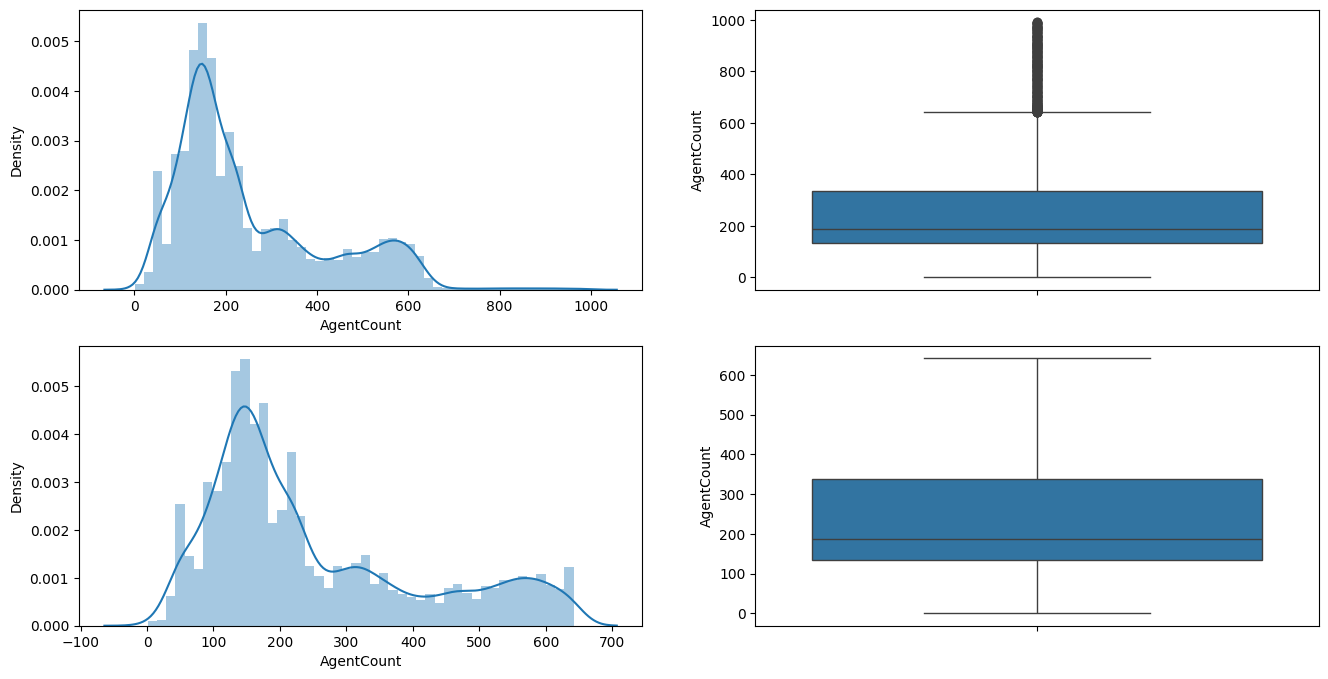

In [42]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['AgentCount'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['AgentCount'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap_2['AgentCount'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap_2['AgentCount'])

plt.show()

# **Z-Squared Testing**

<ipython-input-43-4d1857b616fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_2['Density'])
<ipython-input-43-4d1857b616fb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_2['AgentCount'])


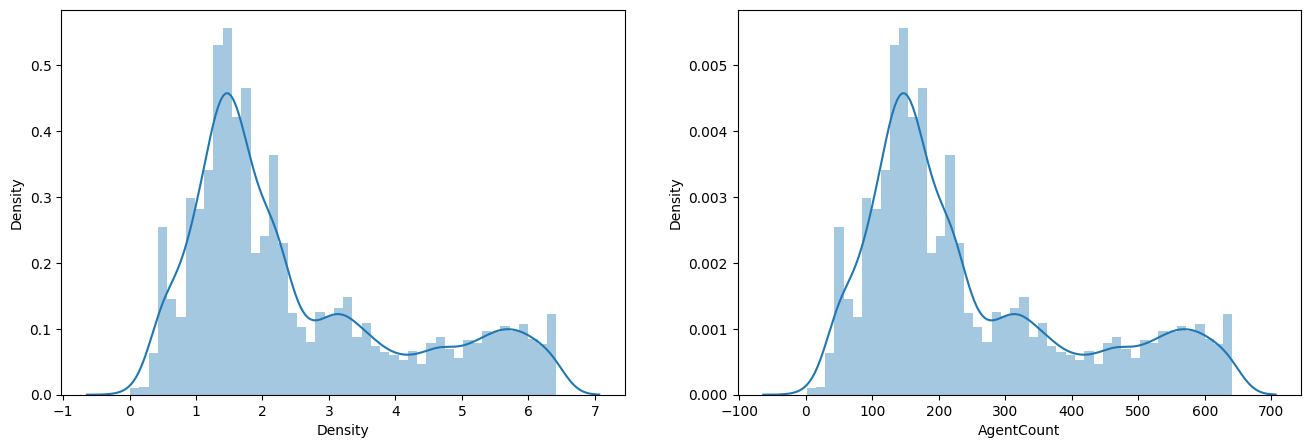

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df_cap_2['Density'])

plt.subplot(1,2,2)
sns.distplot(new_df_cap_2['AgentCount'])

plt.show()

In [44]:


print("Mean value of cgpa",new_df_cap_2['AgentCount'].mean())
print("Std value of cgpa",new_df_cap_2['AgentCount'].std())
print("Min value of cgpa",new_df_cap_2['AgentCount'].min())
print("Max value of cgpa",new_df_cap_2['AgentCount'].max())

Mean value of cgpa 249.66024813689162
Std value of cgpa 163.13134791541606
Min value of cgpa 1.0
Max value of cgpa 641.5


In [45]:
# Finding the boundary values
print("Highest allowed",new_df_cap_2['AgentCount'].mean() + 3*new_df_cap_2['AgentCount'].std())
print("Lowest allowed",new_df_cap_2['AgentCount'].mean() - 3*new_df_cap_2['AgentCount'].std())

Highest allowed 739.0542918831397
Lowest allowed -239.73379560935652


In [46]:
# Finding the outliers
new_df_cap_2[(new_df_cap_2['AgentCount'] > 643.439161995459)]

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level


# **Triming**

In [47]:
# Trimming

new_df = new_df_cap_2[(new_df_cap_2['AgentCount'] < 643.439161995459) ]
new_df

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81.0,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83.0,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86.0,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88.0,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88.0,0.88,-0.0012,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24118,0:14:55,0.3559,20.4337,0.9835,89.1479,139.0,1.39,-0.0029,1,0,normal,0
24119,0:14:56,0.3657,20.4616,1.0152,88.4519,142.0,1.42,0.0306,1,0,normal,0
24120,0:14:57,0.3695,20.4869,1.0084,89.4419,139.0,1.39,-0.0019,1,0,normal,0
24121,0:14:58,0.3580,20.4423,1.0107,90.5225,139.0,1.39,0.0130,1,0,normal,0


# Decision Tree Model Training

## **Post Pruning**


In [48]:
new_df_cap_2.columns


Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

In [49]:
new_df_cap_2.shape


(24019, 12)

In [50]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [51]:
# Select the 3 or 4 columns you want to use
selected_columns = ['Speed', 'Heading', 'Density', 'X']  # Adjust as necessary
X = new_df_cap_2[selected_columns]
y = new_df_cap_2['label2']  # Replace 'target' with the name of your target column

# Handle missing values if any (example: filling with median)
X = X.fillna(X.mean())

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Step 3: Train a decision tree with pre-pruning
# Setting max_depth, min_samples_split, and min_samples_leaf
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [54]:
# Step 4: Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9998612267554815
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2114
      normal       1.00      1.00      1.00      5092

    accuracy                           1.00      7206
   macro avg       1.00      1.00      1.00      7206
weighted avg       1.00      1.00      1.00      7206



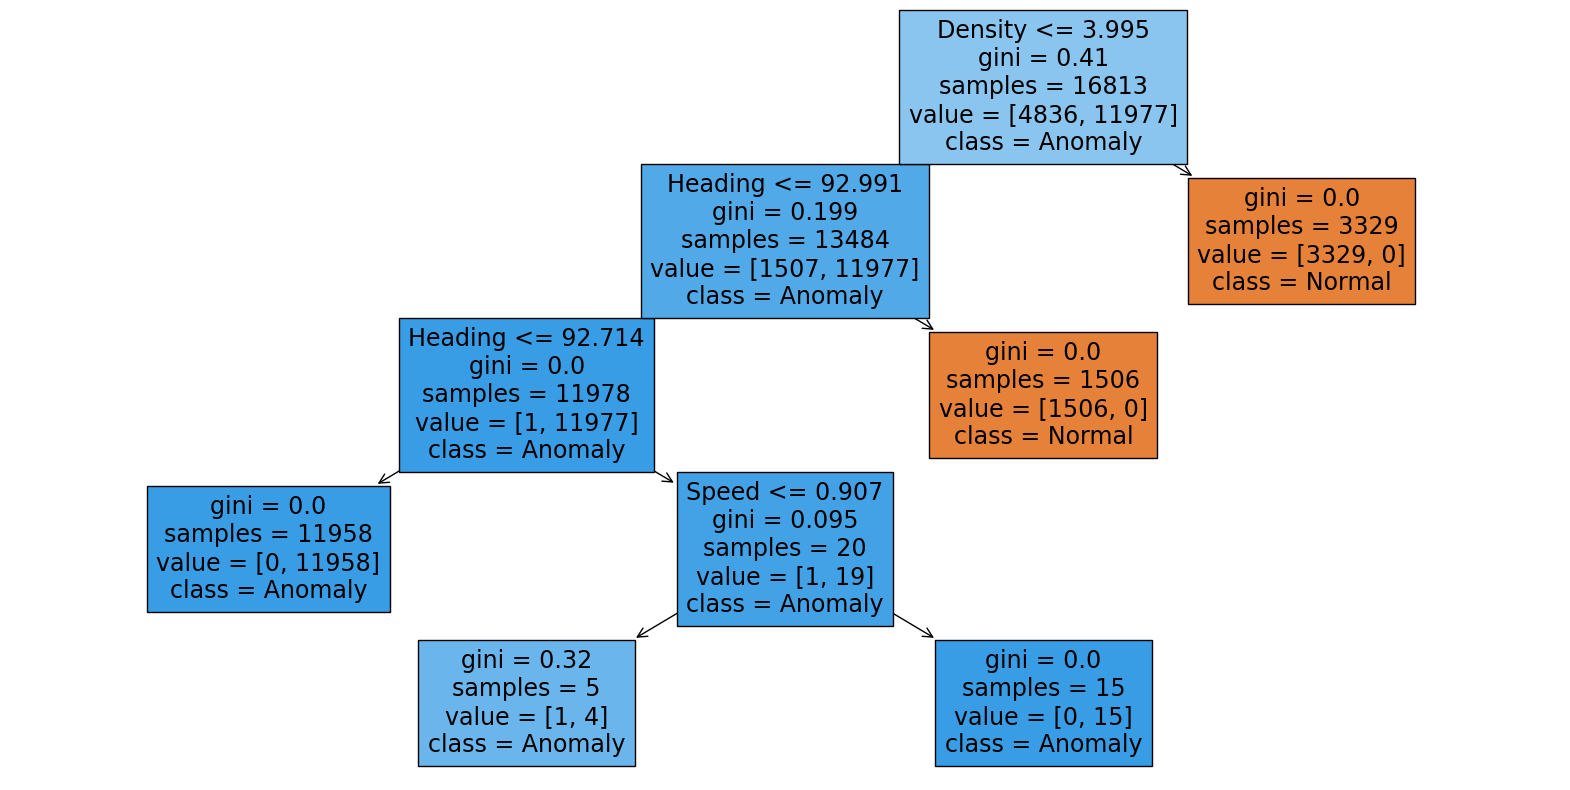

In [55]:
# Optional: Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Anomaly'], filled=True)
plt.show()

# ***ISOLATION FOREST***

In [56]:
from sklearn.ensemble import IsolationForest

In [57]:
new_df_cap_2.columns

Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

In [58]:


# Assuming your dataset has columns such as 'feature1', 'feature2', 'feature3', 'feature4'
X = new_df_cap_2[['Y', 'Speed', 'Heading', 'LevelOfCrowdness']]


In [59]:
# Step 2: Initialize the Isolation Forest model
# Adjust the parameters as needed
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=42)

In [60]:
# Step 3: Predict anomalies
# The prediction returns -1 for anomalies and 1 for normal data points
new_df_cap_2['label2'] = model.predict(X)
new_df_cap_2['label2'] = new_df_cap_2['label2'].map({1: 0, -1: 1})  # Convert to 0 for normal and 1 for anomaly


In [61]:
# Step 4: Evaluate the results
# Count the number of anomalies detected
anomalies = new_df_cap_2[new_df_cap_2['label2'] == 1]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 241


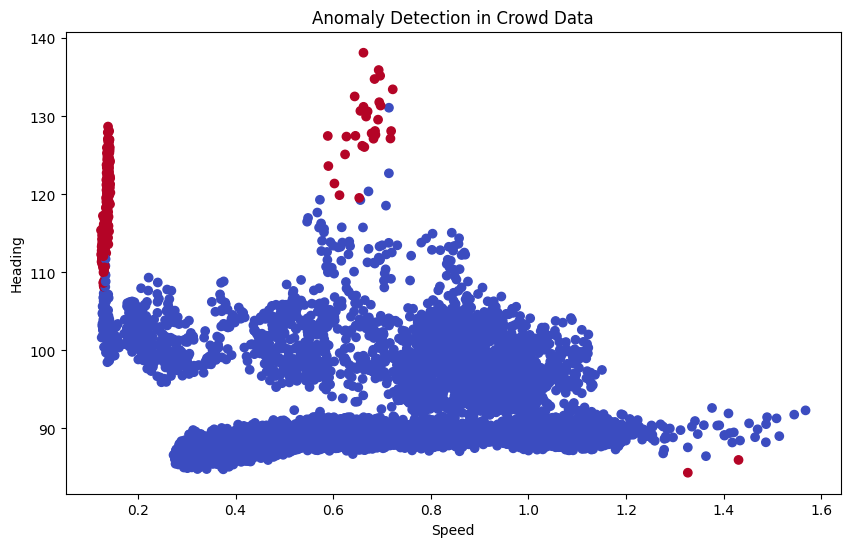

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df_cap_2['Speed'], new_df_cap_2['Heading'], c=new_df_cap_2['label2'], cmap='coolwarm')
plt.title('Anomaly Detection in Crowd Data')
plt.xlabel('Speed')
plt.ylabel('Heading')
plt.show()

# **K-NN Model Training**

In [63]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [64]:
new_df_cap_2.columns

Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

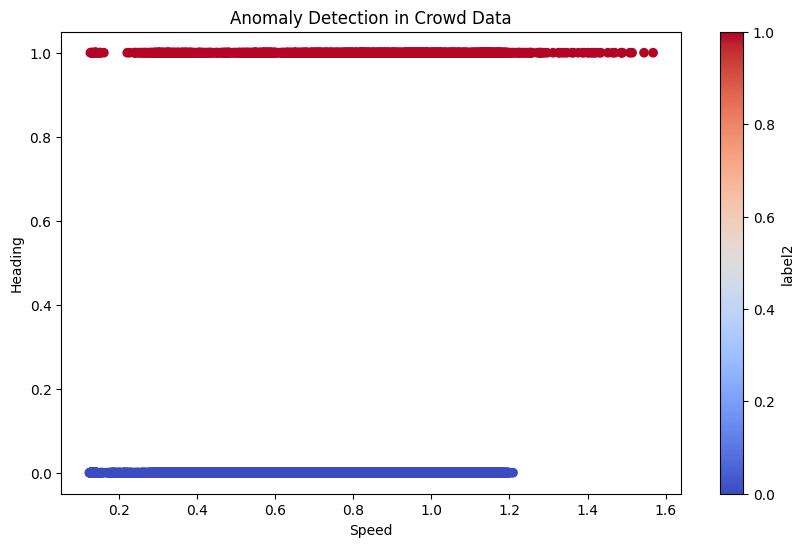

In [65]:
features = ['Speed', 'Heading','Density']  # Add more feature names as necessary
X = new_df_cap_2[features]

# Initialize the LocalOutlierFactor model
# n_neighbors is the number of neighbors to use for k-neighbors queries
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model and predict anomalies (-1 for anomaly, 1 for normal)
new_df_cap_2['label2'] = lof.fit_predict(X)

# Convert the anomaly labels from -1 (anomaly) and 1 (normal) to 1 (anomaly) and 0 (normal)
new_df_cap_2['label2'] = new_df_cap_2['label2'].map({1: 0, -1: 1})



# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(new_df_cap_2['Speed'], new_df_cap_2['label2'], c=new_df_cap_2['label2'], cmap='coolwarm')
plt.title('Anomaly Detection in Crowd Data')
plt.xlabel('Speed')  # Replace with actual x-axis label
plt.ylabel('Heading')  # Replace with actual y-axis label
plt.colorbar(label='label2')
plt.show()



In [66]:
selected_columns = ['Speed', 'Heading', 'Density', 'X']  # Adjust as necessary
X = new_df_cap_2[selected_columns]
y = new_df_cap_2['label2']  # Replace 'target' with the name of your target column

# Handle missing values if any (example: filling with median)
X = X.fillna(X.mean())

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Example with 5 neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9427560366361366


# SVM MODEL

In [67]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split



# Separate features and labels
features = new_df_cap_2[['Speed', 'Heading','Density']]
labels = new_df_cap_2['label2']

# Split the data into training and testing sets
# Ensure the training set only contains normal instances
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [68]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6471
           1       0.00      0.00      0.00       735

    accuracy                           0.90      7206
   macro avg       0.45      0.50      0.47      7206
weighted avg       0.81      0.90      0.85      7206



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DB SCAN MODEL**

In [70]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [71]:
new_df_cap_2.columns


Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

In [72]:
# Feature selection (modify this based on your dataset)
# Assuming the dataset has columns 'feature1', 'feature2', ...
features = new_df_cap_2[['Density', 'Speed', 'Heading']]  # Replace with relevant features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [73]:
# DBSCAN parameters (these may need to be adjusted)
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_features)

# Add the labels to the dataset
new_df_cap_2['label'] = labels


Number of anomalies detected: 25


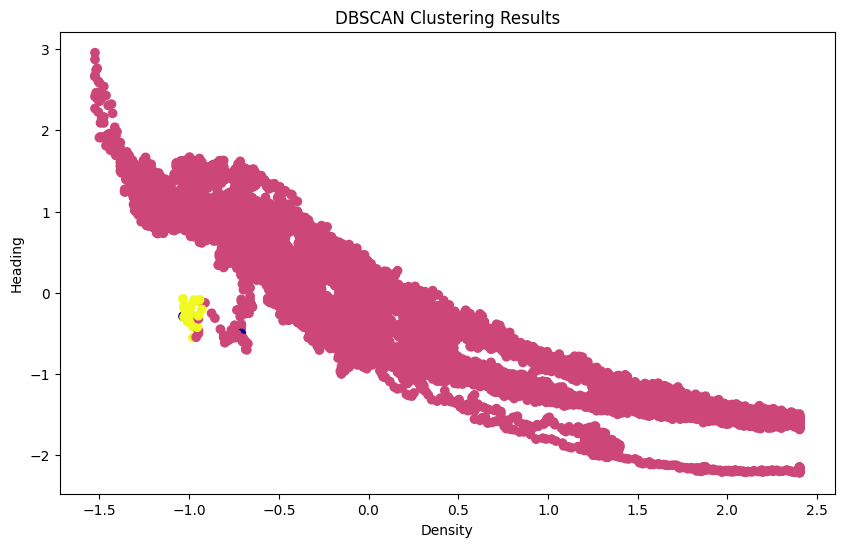

In [74]:
# Count the number of anomalies
num_anomalies = (labels == 1).sum()
print(f'Number of anomalies detected: {num_anomalies}')

# Visualize the results (if the data is 2D or 3D)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='plasma')
plt.xlabel('Density')
plt.ylabel('Heading')
plt.title('DBSCAN Clustering Results')
plt.show()


In [75]:
# Example of fine-tuning
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        num_anomalies = (labels == 1).sum()
        print(f'eps: {eps}, min_samples: {min_samples}, num_anomalies: {num_anomalies}')


eps: 0.3, min_samples: 3, num_anomalies: 5
eps: 0.3, min_samples: 5, num_anomalies: 5
eps: 0.3, min_samples: 7, num_anomalies: 12
eps: 0.5, min_samples: 3, num_anomalies: 0
eps: 0.5, min_samples: 5, num_anomalies: 25
eps: 0.5, min_samples: 7, num_anomalies: 24
eps: 0.7, min_samples: 3, num_anomalies: 0
eps: 0.7, min_samples: 5, num_anomalies: 0
eps: 0.7, min_samples: 7, num_anomalies: 0


In [76]:
# Function to detect anomalies in new data
def detect_anomalies(new_data, dbscan_model, scaler):
    # Preprocess the new data
    scaled_new_data = scaler.transform(new_data)
    labels = dbscan_model.fit_predict(scaled_new_data)
    anomalies = new_data[labels == 1]
    return anomalies

# Example usage with new data
anomalies = detect_anomalies(features, dbscan, scaler)
print(anomalies)


Empty DataFrame
Columns: [Density, Speed, Heading]
Index: []


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np


Accuracy(in %):71.14784129231026


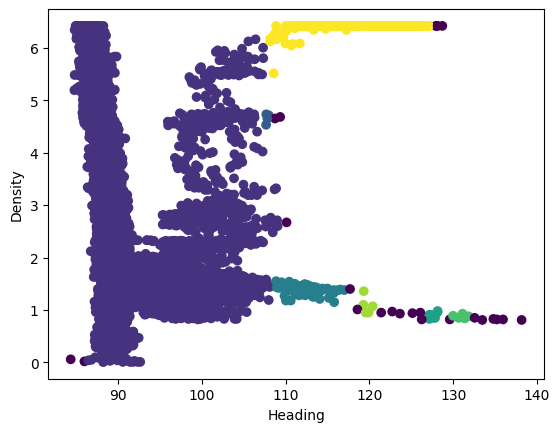

In [81]:
from sklearn.cluster import DBSCAN
dbcan = DBSCAN(eps =0.72)
X_features = ['Heading','Density']
X = new_df_cap_2[X_features]
y = dbcan.fit_predict(X)
y_test  = np.where(y == -1, 1, 0)
y = y.tolist()
dbcan.labels_
plt.scatter(X['Heading'],X['Density'], c = dbcan.labels_,cmap='viridis')
plt.xlabel('Heading')
plt.ylabel('Density')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,df['label'].values)
print(f"Accuracy(in %):{accuracy * 100}")